# Classifying Handwritten Digits from the MNIST Dataset


---



> Using PyTorch



Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

### Load the Dataset

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [3]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

In [4]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Visualize a few examples

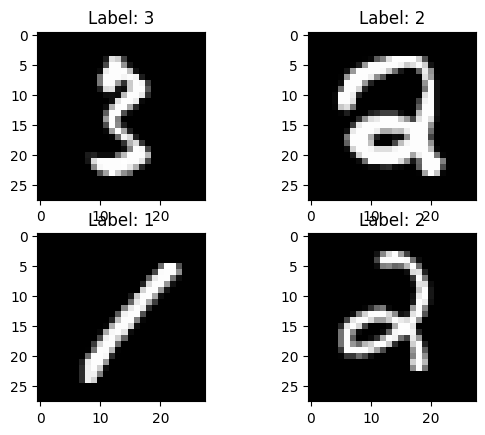

In [5]:
samples = iter(train_loader)
sample_data, sample_target = next(samples)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(sample_data[i][0], cmap='gray')
    plt.title(f"Label: {sample_target[i]}")
plt.show()

### Define the Model

In [6]:
class MNISTModel(nn.Module):

    """
    Multilayer Perceptron for MNIST
    """

    def __init__(self):
        super(MNISTModel, self).__init__()

        # Define the layers
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,32)
        self.fc4 = nn.Linear(32, 10)

    def forward(self, x):
        # Flatten the input
        x = x.view(-1, 28 * 28)

        # Apply ReLU activation
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))

        # Output layer
        x = self.fc4(x)
        return x

In [7]:
model = MNISTModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Train the Model

In [8]:
def train_model(model, train_loader, criterion, optimizer, num_epochs):

    model.train()

    for epoch in range(num_epochs):

        running_loss = 0.0

        for images, labels in train_loader:

            optimizer.zero_grad()

            outputs = model(images)

            loss = criterion(outputs, labels)

            # Backpropagation
            loss.backward()

            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

In [9]:
# Training for 10 epochs
num_epochs = 10
train_model(model, train_loader, criterion, optimizer, num_epochs)

Epoch 1, Loss: 0.4541
Epoch 2, Loss: 0.2030
Epoch 3, Loss: 0.1465
Epoch 4, Loss: 0.1173
Epoch 5, Loss: 0.0994
Epoch 6, Loss: 0.0880
Epoch 7, Loss: 0.0757
Epoch 8, Loss: 0.0722
Epoch 9, Loss: 0.0637
Epoch 10, Loss: 0.0612


### Evaluate the Model

In [10]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Test Accuracy: {100 * correct / total:.2f}%")

In [11]:
evaluate_model(model, test_loader)

Test Accuracy: 97.30%


### Visualize predictions

In [12]:
def visualize_predictions(model, test_loader):
    model.eval()
    images, labels = next(iter(test_loader))
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)

    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i][0], cmap='gray')
        plt.title(f"True: {labels[i]} | Pred: {predictions[i]}")
    plt.show()

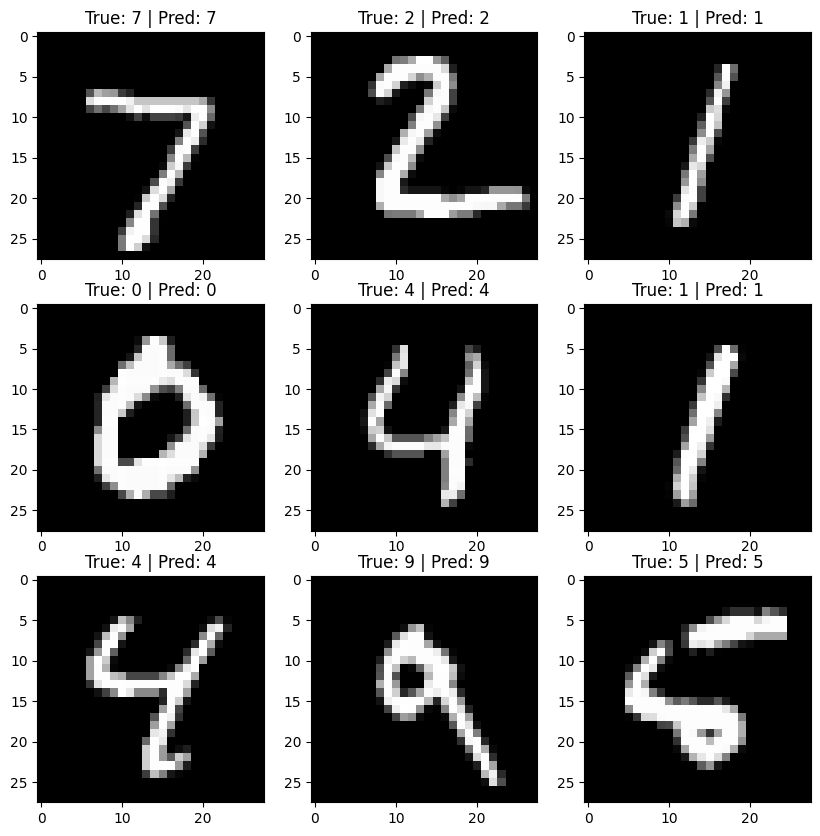

In [13]:
visualize_predictions(model, test_loader)

This straightforward MLP uses ReLU activation for the three hidden layers, and results in an accuracy of **97.30%** . The loss function for the model is cross-entropy (or log loss) and the optimizer is Adaptive Moment Estimation (Adam).
> Will likely revisit later to improve the model.